In [ ]:
# NC_067196.1:21293219-21294117

In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

In [3]:
proj_dir="/master/nplatt/sch_hae_its"

In [4]:
info_df=pd.read_csv(f"{proj_dir}/data/all_samples.csv", sep=",") 
pca_df=pd.read_csv(f"{proj_dir}/results/pca_1m/1m_pca.eigenvec", sep=" ", header=None)
info_df = info_df.merge(pca_df, left_on="sample_id", right_on=0)
info_df

,sample_id,country,species,sra,project,datatype,locale,host,phenotype,0,...,12,13,14,15,16,17,18,19,20,21
0,sha_angola_cota_57,angola,s_sp,SRR11907442,scan_africa,genome,na,snail,unk,sha_angola_cota_57,...,-0.001240,-0.015622,-0.000078,-0.002819,-0.000751,-0.001089,0.000665,-0.000721,-0.001899,-0.003767
1,sha_angola_cota_58,angola,s_sp,SRR11907441,scan_africa,genome,na,snail,unk,sha_angola_cota_58,...,-0.001485,-0.015099,-0.000214,-0.002443,0.000006,-0.001083,0.000878,-0.000134,-0.001550,-0.003378
2,sha_angola_cota_59,angola,s_sp,SRR11907440,scan_africa,genome,na,snail,unk,sha_angola_cota_59,...,-0.000969,-0.015471,0.001312,-0.001744,-0.002326,-0.002069,0.000767,-0.000480,-0.001726,-0.003833
3,sha_angola_icau_60,angola,s_haematobium,SRR11907439,scan_africa,genome,na,human,haematobium,sha_angola_icau_60,...,-0.001816,-0.015994,0.000054,-0.002381,0.001021,-0.000822,0.000794,-0.000274,-0.001608,-0.003448
4,sha_angola_icau_61,angola,s_haematobium,SRR11907438,scan_africa,genome,na,human,haematobium,sha_angola_icau_61,...,-0.001100,-0.016133,0.000174,-0.001861,-0.002519,-0.000738,0.000870,-0.000332,-0.001717,-0.004195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,ERR5919562,na,s_curassoni,ERR5919562,berger,genome,na,na,na,ERR5919562,...,0.039024,-0.028318,0.000240,0.007074,0.001136,0.001744,-0.001323,0.002430,0.002934,0.000451
393,ERR5919563,na,mixed_sample,ERR5919563,berger,genome,na,na,na,ERR5919563,...,0.039008,-0.028732,0.000427,0.006990,-0.001163,0.003530,-0.001159,0.003008,0.003852,-0.000893
394,ERR5919564,na,s_curassoni,ERR5919564,berger,genome,na,na,na,ERR5919564,...,0.038481,-0.028777,0.000853,0.006119,-0.000022,0.001092,-0.001819,0.002727,0.003790,0.000835
395,ERR5919567,na,s_bovis,ERR5919567,berger,genome,na,na,na,ERR5919567,...,-0.149807,0.153379,0.000788,-0.010787,-0.013760,-0.013072,-0.006158,-0.009658,-0.018294,0.007822


# Calculate and compare mappability

In [5]:
Path(f"{proj_dir}/results/mappability").mkdir(parents=True, exist_ok=True)
os.chdir(f"{proj_dir}/results/mappability")

In [ ]:
!conda run -n sch_hae_its-mappability genmap index --fasta-file ../../data/SH_V3.fa --index $(pwd)/index/ --algorithm divsufsort

In [ ]:
!conda run -n sch_hae_its-mappability genmap index --fasta-file ../../data/SH_V3.fa --index $(pwd)/index_s/ --algorithm skew

In [24]:
%%bash

QSUB="qsub -V -cwd -S /bin/bash -q all.q -j y -pe smp 64 " 

for K in 90 100 125; do
    for E in 0 1 2; do

        RUN_ID="k${K}_e${E}"

        #mkdir $RUN_ID

        CMD="conda run -n sch_hae_its-mappability genmap map --index index_s/ --length $K --errors $E --txt --bg --wig --csv --threads 64 --output $RUN_ID"

        echo $CMD | $QSUB -N $RUN_ID -o $RUN_ID.log
    done
done


Your job 1139995 ("k90_e0") has been submitted
Your job 1139996 ("k90_e1") has been submitted
Your job 1139997 ("k90_e2") has been submitted
Your job 1139998 ("k100_e0") has been submitted
Your job 1139999 ("k100_e1") has been submitted
Your job 1140000 ("k100_e2") has been submitted
Your job 1140001 ("k125_e0") has been submitted
Your job 1140002 ("k125_e1") has been submitted
Your job 1140003 ("k125_e2") has been submitted


In [ ]:
awk '$1 == "NC_067196.1" && $2 >= 20293219 && $3 <= 24294117'  k125_e2/SH_V3.genmap.bedgraph >k125_e2/SH_V3.its.genmap.bedgraph
awk '$1 == "NC_067196.1" && $2 >= 20293219 && $3 <= 24294117'  k60_e1/SH_V3.genmap.bedgraph >k60_e1/SH_V3.its.genmap.bedgraph
awk '$1 == "NC_067196.1" && $2 >= 20293219 && $3 <= 24294117'  k45_e1/SH_V3.genmap.bedgraph >k45_e1/SH_V3.k45_e1.its.genmap.bedgraph
awk '$1 == "NC_067196.1" && $2 >= 20293219 && $3 <= 24294117'  k125_e0/SH_V3.genmap.bedgraph >k125_e0/SH_V3.its.genmap.bedgraph


In [22]:
!conda run -n bedtools bedtools map -a its_sized_windows.bed -b  k125_e2/SH_V3.genmap.bedgraph -c 4 -o mean >its.k125_e2.mean.bed

Error: Unable to open file k125_e0/SH_V3.genmap.bedgraph. Exiting.

ERROR conda.cli.main_run:execute(49): `conda run bedtools map -a its_sized_windows.bed -b k125_e0/SH_V3.genmap.bedgraph -c 4 -o mean` failed. (See above for error)


In [25]:
df=pd.read_csv("its.k125_e2.mean.bed", sep="\t", header=None, names=["chrom", "start", "stop", "map_mean"], low_memory=False)
df

,chrom,start,stop,map_mean
0,NC_067195.1,0,922,0.75
1,NC_067195.1,922,1844,0.4814815
2,NC_067195.1,1844,2766,0.4937499583
3,NC_067195.1,2766,3688,0.05881527733
4,NC_067195.1,3688,4610,0.01915934796
...,...,...,...,...
434216,NW_026137019.1,34114,35036,0.4571427143
434217,NW_026137019.1,35036,35958,0.5476188571
434218,NW_026137019.1,35958,36880,0.6190474286
434219,NW_026137019.1,36880,37802,0.5555553333


In [26]:
df['map_mean'] = pd.to_numeric(df['map_mean'], errors='coerce')
df = df.dropna(subset=['map_mean'])
df

,chrom,start,stop,map_mean
0,NC_067195.1,0,922,0.750000
1,NC_067195.1,922,1844,0.481482
2,NC_067195.1,1844,2766,0.493750
3,NC_067195.1,2766,3688,0.058815
4,NC_067195.1,3688,4610,0.019159
...,...,...,...,...
434216,NW_026137019.1,34114,35036,0.457143
434217,NW_026137019.1,35036,35958,0.547619
434218,NW_026137019.1,35958,36880,0.619047
434219,NW_026137019.1,36880,37802,0.555555


In [29]:
df["map_mean"].mean()

0.7783499253980124

In [30]:
df["map_mean"].median()

1.0

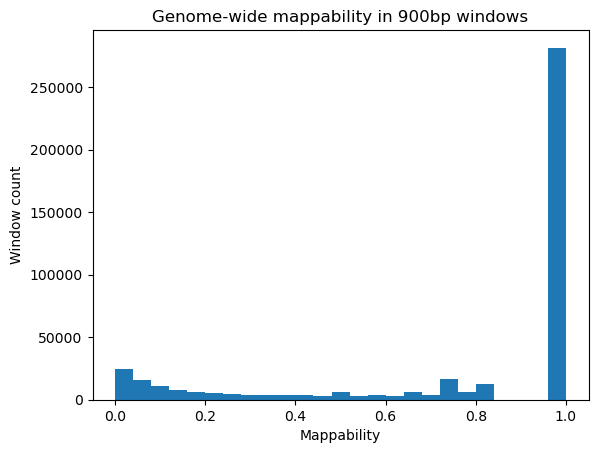

In [37]:
plt.hist(df["map_mean"], bins=25, cumulative=False)
plt.title("Genome-wide mappability in 900bp windows")
plt.xlabel("Mappability")
plt.ylabel("Window count")

plt.show()

In [32]:
!conda run -n bedtools bedtools map -a its.bed -b  k125_e2/SH_V3.genmap.bedgraph -g ../../data/SH_V3.fa.fai -c 4 -o mean

NC_067196.1	21293219	21294117	0.5499999



In [33]:
percentileofscore(df["map_mean"], 0.5499999)


23.15074771585646